<a href="https://colab.research.google.com/github/Shalinivelappan1/Digital/blob/main/cvar_optimization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas_datareader.data as web
import datetime

In [2]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
start = datetime.datetime(2019,9,15)
end = datetime.datetime(2021,9,15)

In [5]:
def get_stock(ticker):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    print(data.head())
    return data 

In [6]:
from functools import reduce

def combine_stocks(tickers):
    data_frames = []
    for i in tickers:
        data_frames.append(get_stock(i))
        
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    print(df_merged.head())
    return df_merged


In [7]:
import yfinance as yf
from pandas_datareader import data as pdr #import pandas datareader

In [2]:
yf.pdr_override()

In [8]:
data = pdr.get_data_yahoo("TSLA", start="2022-12-01", end="2023-02-08")

TypeError: ignored

In [128]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
#y_symbols = ['ES=F','^GSPC', '^DJI', '^FTSE', 'MSCI','JPGB','EMB','EMX','FM','HGGB.TO', 'BTC-USD','BTC=F', 'ETH-USD','XRP-USD', 'DGX-USD','USDT-USD','LTC-USD','XLM-USD','^CMC200','BITW', '^TNX','^FVX','^IRX','^NYICDX', 'EURUSD=X','GBPUSD=X','JPY=X','CAD=X','AUDUSD=X', 'GC=F','CL=F', 'GD=F', 'BZ=F', 'SI=F','HG=F','KC=F', '^CMC200',   ]
y_symbols = ['ES=F','^GSPC', '^DJI', '^FTSE', 'MSCI','JPGB','EMB','EMX','FM','HGGB.TO', 'BTC-USD','BTC=F', 'ETH-USD','XRP-USD', 'DGX-USD','LTC-USD','XLM-USD','^CMC200','BITW', 'EURUSD=X','GBPUSD=X','CAD=X','AUDUSD=X', 'GC=F','CL=F', 'GD=F', 'BZ=F', 'SI=F','HG=F','KC=F', '^CMC200',   ]

from datetime import datetime
startdate = datetime(2021,12,1)
enddate = datetime(2022,12,30)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)['Adj Close']



[*********************100%***********************]  30 of 30 completed


In [129]:
data = data.dropna()


In [130]:
data.to_csv("data.csv", index=False)

In [131]:
portfolio = pd.read_csv("data.csv")


In [67]:
pip install pyportfolioopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

In [133]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'AUDUSD=X': 0.0, 'BITW': 0.0, 'BTC-USD': 0.0, 'BTC=F': 0.0, 'BZ=F': 0.26411, 'CAD=X': 0.07986, 'CL=F': 0.26438, 'DGX-USD': 0.03744, 'EMB': 0.0, 'EMX': 0.0, 'ES=F': 0.0, 'ETH-USD': 0.0, 'EURUSD=X': 0.0, 'FM': 0.0, 'GBPUSD=X': 0.0, 'GC=F': 0.0, 'GD=F': 0.2177, 'HG=F': 0.0, 'HGGB.TO': 0.0, 'JPGB': 0.0, 'KC=F': 0.0, 'LTC-USD': 0.0, 'MSCI': 0.0, 'SI=F': 0.09051, 'XLM-USD': 0.0, 'XRP-USD': 0.0, '^CMC200': 0.0, '^DJI': 0.0, '^FTSE': 0.046, '^GSPC': 0.0}


Portfolio Allocation


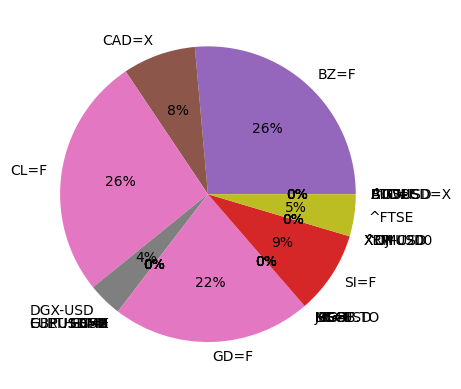

In [134]:
cleaned_weights = ef.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

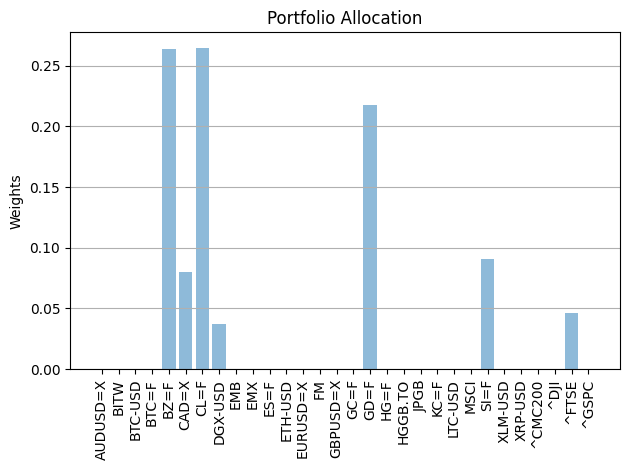

In [135]:
x_pos = np.arange(len(labels))
CTEs = values

# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Weights')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Portfolio Allocation')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

In [136]:
ef.portfolio_performance(verbose=True)

Expected annual return: 16.0%
Annual volatility: 49.4%
Sharpe Ratio: 0.28


(0.15965039300475592, 0.4939281355323089, 0.28273423390682934)

In [137]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'CL=F': 337, 'BZ=F': 321, 'GD=F': 36, 'SI=F': 375, 'CAD=X': 5872, 'DGX-USD': 84}
Funds remaining: $4718.65


In [138]:
from pypfopt import HRPOpt

In [139]:
returns = portfolio.pct_change().dropna()

In [140]:
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()

In [141]:
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

Expected annual return: -4.9%
Annual volatility: 2.9%
Sharpe Ratio: -2.33
{'AUDUSD=X': 0.11602061443349691, 'BITW': 0.0007736946967783372, 'BTC-USD': 0.0005077918980066631, 'BTC=F': 0.0005050689841456811, 'BZ=F': 0.0011382673936656724, 'CAD=X': 0.3017796501671554, 'CL=F': 0.001182610033173289, 'DGX-USD': 5.596392053500753e-05, 'EMB': 0.008502165218966186, 'EMX': 0.0013241434306642947, 'ES=F': 0.002475951864020859, 'ETH-USD': 0.00030134632858118594, 'EURUSD=X': 0.03333124373617158, 'FM': 0.016182822891358858, 'GBPUSD=X': 0.0211904042087316, 'GC=F': 0.009769750911218893, 'GD=F': 0.0026471956826697174, 'HG=F': 0.0033364108235065235, 'HGGB.TO': 0.2491581981595469, 'JPGB': 0.19355158993383972, 'KC=F': 0.0034646128995087034, 'LTC-USD': 0.0006468071172419504, 'MSCI': 0.0011989175995771875, 'SI=F': 0.0022252668631478453, 'XLM-USD': 0.0006974227067576514, 'XRP-USD': 0.0005068308760266607, '^CMC200': 0.00044956345223602856, '^DJI': 0.003595796633378597, '^FTSE': 0.017516133960571976, '^GSPC': 0.

Portfolio Allocation


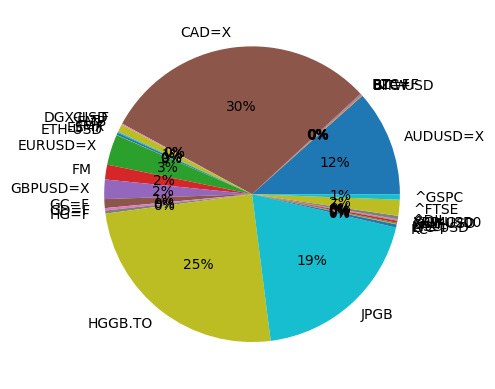

In [143]:
cleaned_weights = hrp_weights #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

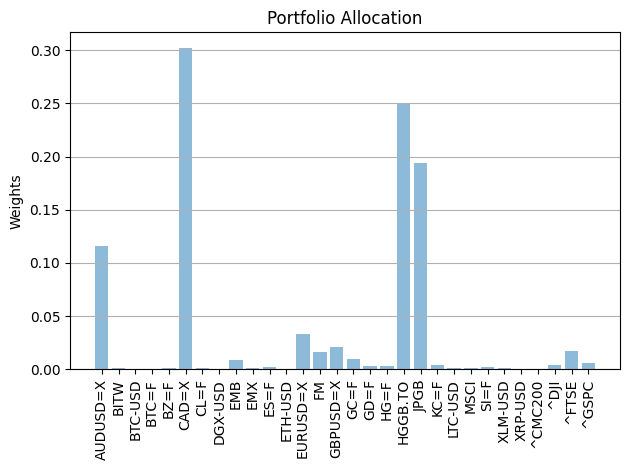

In [144]:
x_pos = np.arange(len(labels))
CTEs = values

# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Weights')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Portfolio Allocation')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

In [145]:
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'CAD=X': 22190, 'HGGB.TO': 1157, 'JPGB': 419, 'AUDUSD=X': 17195, 'EURUSD=X': 3135, 'GBPUSD=X': 1761, 'FM': 63, 'GC=F': 1, 'EMB': 10, 'KC=F': 2, 'HG=F': 87, 'GD=F': 1, 'SI=F': 9, 'EMX': 71, 'MSCI': 1, 'CL=F': 2, 'BZ=F': 2, 'BITW': 15, 'XLM-USD': 968, 'LTC-USD': 1, 'XRP-USD': 147, '^CMC200': 1, 'ETH-USD': 1}
Funds remaining (HRP): $11.70


In [146]:
from pypfopt.efficient_frontier import EfficientCVaR

In [147]:
S = portfolio.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))

{'AUDUSD=X': 0.0, 'BITW': 0.0, 'BTC-USD': 0.0, 'BTC=F': 0.0, 'BZ=F': 0.0, 'CAD=X': 0.98427, 'CL=F': 0.0, 'DGX-USD': 0.0, 'EMB': 0.0, 'EMX': 0.0, 'ES=F': 0.0, 'ETH-USD': 0.0, 'EURUSD=X': 0.0, 'FM': 0.0, 'GBPUSD=X': 0.0, 'GC=F': 0.0, 'GD=F': 0.0, 'HG=F': 0.0, 'HGGB.TO': 0.0, 'JPGB': 0.0, 'KC=F': 0.00082, 'LTC-USD': 0.0, 'MSCI': 0.0, 'SI=F': 0.01483, 'XLM-USD': 0.0, 'XRP-USD': 0.0, '^CMC200': 0.0, '^DJI': 0.0, '^FTSE': 0.0, '^GSPC': 0.0}


Portfolio Allocation


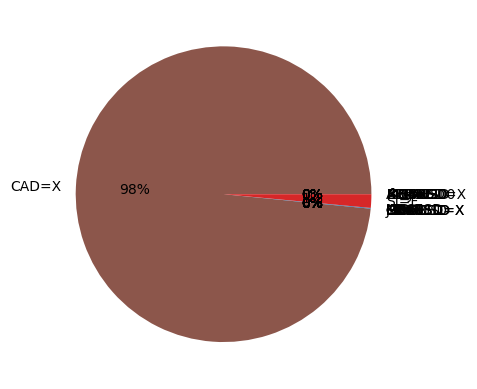

In [148]:
cleaned_weights = ef_cvar.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

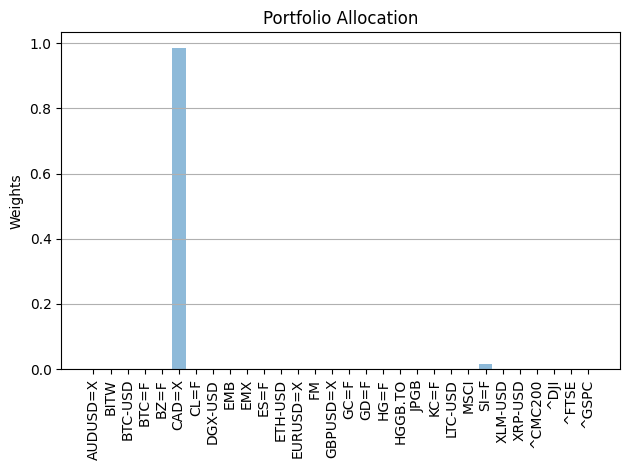

In [149]:
x_pos = np.arange(len(labels))
CTEs = values

# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Weights')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Portfolio Allocation')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

In [37]:
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'JPY=X': 419, 'DGX-USD': 434, 'LTC-USD': 145, 'KC=F': 44, 'GD=F': 7, 'MSCI': 7, '^IRX': 1, '^FVX': 1, '^TNX': 1, 'XRP-USD': 1, 'EURUSD=X': 1}
Funds remaining (CVAR): $0.24


In [33]:
mu

AUDUSD=X    -0.052232
BITW        -0.890891
BTC-USD     -0.703535
BTC=F       -0.703317
BZ=F         0.191113
CAD=X        0.063550
CL=F         0.192335
EMB         -0.167886
EMX         -0.210716
ES=F        -0.139188
ETH-USD     -0.732502
EURUSD=X    -0.060936
FM          -0.226313
GBPUSD=X    -0.093909
GC=F         0.020937
GD=F         0.156506
HG=F        -0.098923
HGGB.TO     -0.125383
JPGB        -0.082883
JPY=X        0.179909
KC=F        -0.270271
LTC-USD     -0.674826
MSCI        -0.223736
SI=F         0.078485
XLM-USD     -0.775045
XRP-USD     -0.648230
^CMC200     -0.731154
^DJI        -0.023187
^FTSE        0.047219
^FVX         2.359015
^GSPC       -0.144953
^IRX        79.126195
^NYICDX      0.079787
^TNX         1.633546
dtype: float64

In [34]:
S

,AUDUSD=X,BITW,BTC-USD,BTC=F,BZ=F,CAD=X,CL=F,EMB,EMX,ES=F,ETH-USD,EURUSD=X,FM,GBPUSD=X,GC=F,GD=F,HG=F,HGGB.TO,JPGB,JPY=X,KC=F,LTC-USD,MSCI,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^FVX,^GSPC,^IRX,^NYICDX,^TNX
AUDUSD=X,0.000969,0.273393,2.830394e+02,2.838912e+02,0.119273,-0.001103,0.151051,0.171856,0.004862,7.696587e+00,2.110691e+01,0.001302,0.093729,0.002081,2.423611,0.766374,0.012454,0.026722,0.049010,-0.291691,0.470496,0.738549,0.726968,0.050550,0.001331,0.004013,6.742811e+00,3.635734e+01,3.564796,-0.022505,7.887138e+00,-0.039356,-0.141871,-0.019529
BITW,0.273393,144.582271,1.346691e+05,1.352264e+05,-22.591701,-0.325923,-9.034176,82.836171,2.062458,3.376678e+03,1.090939e+04,0.542208,38.615696,0.809546,597.633334,-104.336868,4.521816,12.619520,22.595838,-122.498583,197.922136,404.062463,463.667102,16.354538,0.736838,2.241499,3.389786e+03,1.567490e+04,668.148314,-10.112837,3.443483e+03,-16.031946,-57.315969,-8.586557
BTC-USD,283.039418,134669.099121,1.300340e+08,1.303880e+08,-3937.928134,-329.839364,9489.838246,75929.684139,1982.173732,3.179916e+06,1.032156e+07,515.185845,36937.368508,779.486764,662937.932621,8178.126518,4578.161431,11663.448572,20985.063165,-116157.685951,185346.785679,375988.687277,398814.279092,17053.141305,684.690006,2124.131688,3.226018e+06,1.472543e+07,756749.991566,-9394.954045,3.245914e+06,-15564.882215,-54811.001886,-8001.433735
BTC=F,283.891184,135226.372027,1.303880e+08,1.310151e+08,-4588.179177,-330.887118,8940.380487,76299.966127,1985.764513,3.196231e+06,1.036301e+07,516.619920,37062.055178,781.417632,661326.955815,4943.682519,4584.732934,11717.025396,21074.974627,-116453.132946,186350.628436,377427.665433,401601.455896,17033.803466,687.799650,2129.300700,3.239962e+06,1.480166e+07,759117.755447,-9432.203155,3.262357e+06,-15616.681745,-54955.517233,-8031.064118
BZ=F,0.119273,-22.591701,-3.937928e+03,-4.588179e+03,166.776238,-0.181337,168.730566,-30.682497,0.104050,-8.476537e+02,-2.176045e+03,-0.084261,-1.330823,-0.021096,500.178438,904.519014,1.286726,-2.415182,-7.000444,11.584072,72.512686,-150.243278,-442.635683,3.293760,-0.157820,-0.429494,-4.505950e+02,-7.547150e+03,62.941718,1.347513,-8.236926e+02,-4.069833,5.172856,1.027667
CAD=X,-0.001103,-0.325923,-3.298394e+02,-3.308871e+02,-0.181337,0.001471,-0.222068,-0.200256,-0.005512,-8.893628e+00,-2.411617e+01,-0.001443,-0.110631,-0.002387,-2.457549,-1.018349,-0.013225,-0.033227,-0.055099,0.336477,-0.711516,-0.788377,-0.734799,-0.043313,-0.001609,-0.004147,-7.807074e+00,-3.799615e+01,-3.944864,0.028431,-9.142619e+00,0.050868,0.160797,0.024538
CL=F,0.151051,-9.034176,9.489838e+03,8.940380e+03,168.730566,-0.222068,175.766216,-21.548676,0.307727,-5.697741e+02,-1.241244e+03,-0.013017,3.199150,0.083007,592.528357,930.378244,1.900441,-1.039730,-4.603339,-4.176217,97.164262,-114.678404,-422.150242,5.509745,-0.092522,-0.258882,-1.347755e+02,-6.224910e+03,185.304539,0.161761,-5.370051e+02,-6.188652,-2.276842,0.054923
EMB,0.171856,82.836171,7.592968e+04,7.629997e+04,-30.682497,-0.200256,-21.548676,57.799986,1.218849,2.221945e+03,6.251455e+03,0.374535,24.414397,0.546305,361.539631,-154.956370,2.687270,8.177920,15.273628,-81.521306,105.801960,248.445689,348.812943,10.516480,0.422676,1.216381,1.935953e+03,1.166298e+04,713.025497,-6.660338,2.263257e+03,-9.192058,-39.304894,-5.645860
EMX,0.004862,2.062458,1.982174e+03,1.985765e+03,0.104050,-0.005512,0.307727,1.218849,0.041895,5.113284e+01,1.551394e+02,0.008568,0.587076,0.012967,12.674478,0.831220,0.075539,0.187300,0.332783,-1.932488,2.878208,5.794038,7.349708,0.320885,0.010185,0.032477,4.901933e+01,2.425686e+02,11.605887,-0.155561,5.214723e+01,-0.238061,-0.920843,-0.133920
ES=F,7.696587,3376.678492,3.179916e+06,3.196231e+06,-847.653702,-8.893628,-569.774063,2221.944868,51.132839,9.851372e+04,2.659424e+05,14.074393,987.588335,21.450377,15945.039913,-4058.282897,111.294614,319.564402,601.293418,-3100.268441,4071.838181,10020.564342,14547.735757,430.083433,17.344641,51.572545,8.101445e+04,5.207834e+05,34894.136792,-255

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [36]:
mean = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio) # for sample covariance matrix

Covariance between daily simple returns of stocks in your portfolio


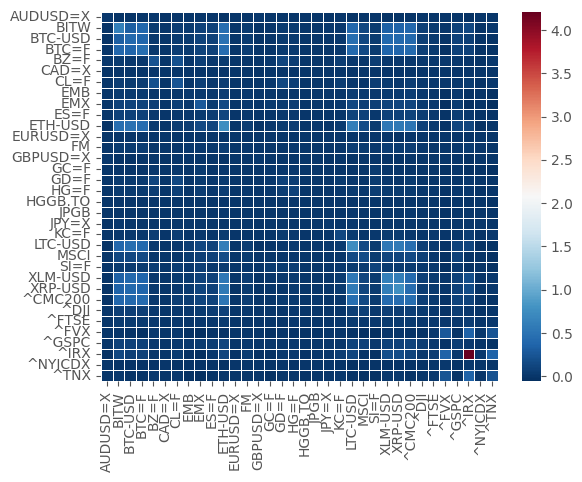

In [37]:
plt.style.use('ggplot')
fig = plt.figure()
sb.heatmap(S,xticklabels=S.columns, yticklabels=S.columns,
cmap='RdBu_r', annot=False, linewidth=0.5)
print('Covariance between daily simple returns of stocks in your portfolio')
plt.show(fig)

In [38]:
correlation_matrix = portfolio.corr(method='pearson')
correlation_matrix


,AUDUSD=X,BITW,BTC-USD,BTC=F,BZ=F,CAD=X,CL=F,EMB,EMX,ES=F,ETH-USD,EURUSD=X,FM,GBPUSD=X,GC=F,GD=F,HG=F,HGGB.TO,JPGB,JPY=X,KC=F,LTC-USD,MSCI,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^FVX,^GSPC,^IRX,^NYICDX,^TNX
AUDUSD=X,1.000000,0.730440,0.797394,0.796794,0.296709,-0.923760,0.366024,0.726200,0.763115,0.787779,0.731137,0.790624,0.873159,0.855399,0.866170,0.341975,0.849936,0.769821,0.772364,-0.824580,0.588954,0.668569,0.412281,0.726095,0.685864,0.648850,0.759607,0.641976,0.578921,-0.772493,0.792750,-0.837715,-0.828787,-0.784081
BITW,0.730440,1.000000,0.982160,0.982524,-0.145487,-0.706637,-0.056671,0.906147,0.838002,0.894713,0.978278,0.852419,0.931258,0.861466,0.552921,-0.120525,0.798876,0.941128,0.921845,-0.896457,0.641369,0.946899,0.680726,0.608127,0.982793,0.938227,0.988572,0.716505,0.280896,-0.898621,0.895988,-0.883396,-0.866786,-0.892447
BTC-USD,0.797394,0.982160,1.000000,0.998961,-0.026741,-0.754072,0.062772,0.875829,0.849241,0.888462,0.975969,0.854044,0.939294,0.874650,0.646740,0.009961,0.852878,0.917196,0.902753,-0.896346,0.633327,0.929092,0.617399,0.668636,0.962971,0.937518,0.992046,0.709760,0.335470,-0.880293,0.890575,-0.904366,-0.874044,-0.876921
BTC=F,0.796794,0.982524,0.998961,1.000000,-0.031039,-0.753630,0.058915,0.876799,0.847588,0.889670,0.976213,0.853209,0.938929,0.873528,0.642748,0.005999,0.850898,0.917953,0.903220,-0.895255,0.634368,0.929150,0.619381,0.665372,0.963716,0.936274,0.992596,0.710758,0.335257,-0.880468,0.891729,-0.903972,-0.873061,-0.876866
BZ=F,0.296709,-0.145487,-0.026741,-0.031039,1.000000,-0.366065,0.985505,-0.312507,0.039364,-0.209124,-0.181685,-0.123340,-0.029883,-0.020902,0.430867,0.972857,0.211662,-0.167705,-0.265917,0.078931,0.218785,-0.327824,-0.605066,0.114035,-0.195993,-0.167385,-0.122352,-0.321209,0.024638,0.111488,-0.199554,-0.208803,0.072838,0.099450
CAD=X,-0.923760,-0.706637,-0.754072,-0.753630,-0.366065,1.000000,-0.436673,-0.686690,-0.702001,-0.738702,-0.677901,-0.710912,-0.836336,-0.796119,-0.712732,-0.368751,-0.732437,-0.776770,-0.704647,0.771881,-0.722761,-0.579142,-0.338167,-0.504863,-0.672828,-0.544118,-0.713708,-0.544440,-0.519877,0.791946,-0.745712,0.878636,0.762274,0.799476
CL=F,0.366024,-0.056671,0.062772,0.058915,0.985505,-0.436673,1.000000,-0.213791,0.113401,-0.136926,-0.100951,-0.018560,0.069973,0.080113,0.497195,0.974744,0.304516,-0.070326,-0.170330,-0.027719,0.285568,-0.243740,-0.562112,0.185814,-0.111925,-0.098279,-0.035648,-0.258070,0.070656,0.013037,-0.126728,-0.309282,-0.031229,0.005177
EMB,0.726200,0.906147,0.875829,0.876799,-0.312507,-0.686690,-0.213791,1.000000,0.783255,0.931153,0.886618,0.931265,0.931206,0.919445,0.529027,-0.283103,0.750882,0.964589,0.985520,-0.943546,0.542252,0.920831,0.809939,0.618472,0.891643,0.805253,0.892944,0.843175,0.474101,-0.936038,0.931391,-0.801079,-0.940106,-0.928084
EMX,0.763115,0.838002,0.849241,0.847588,0.039364,-0.702001,0.113401,0.783255,1.000000,0.795919,0.817257,0.791259,0.831717,0.810609,0.688863,0.056407,0.783995,0.820577,0.797563,-0.830788,0.547912,0.797648,0.633886,0.700939,0.798032,0.798581,0.839804,0.651364,0.286633,-0.812041,0.797096,-0.770605,-0.818082,-0.817679
ES=F,0.787779,0.894713,0.888462,0.889670,-0.209124,-0.738702,-0.136926,0.931153,0.795919,1.000000,0.913605,0.847668,0.912413,0.874461,0.565149,-0.179594,0.753269,0.913006,0.939777,-0.869174,0.505491,0.899614,0.818221,0.612658,0.886267,0.826984,0.905123,0.911971,0.561997,-0.869178,0.999801,-0.765194,-0.874909,-0.869427


Correlation between Stocks in your portfolio


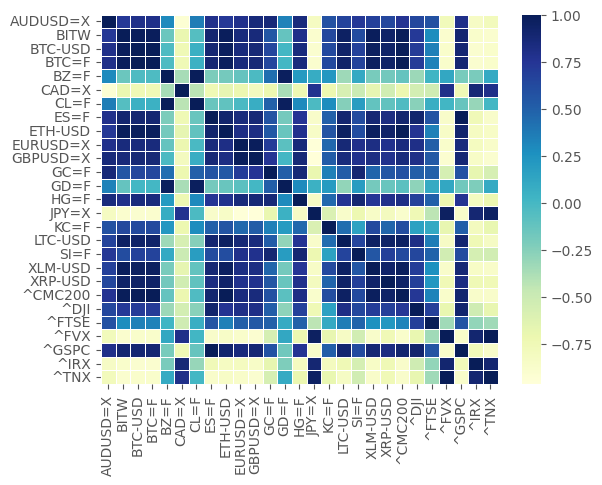

In [172]:
fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=False, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)

In [173]:
daily_simple_return = portfolio.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return

,AUDUSD=X,BITW,BTC-USD,BTC=F,BZ=F,CAD=X,CL=F,ES=F,ETH-USD,EURUSD=X,GBPUSD=X,GC=F,GD=F,HG=F,JPY=X,KC=F,LTC-USD,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^FVX,^GSPC,^IRX,^TNX
1,-0.002442,-0.003477,-0.013140,0.003246,0.011616,0.002865,0.014183,0.014916,-0.016501,-0.000951,-0.001198,-0.011731,0.009121,0.012125,-0.003681,0.013877,-0.026231,-0.000852,0.031810,-0.018788,-0.009674,0.018157,-0.005510,0.045887,0.014194,-0.140000,0.009763
2,-0.002785,-0.057882,-0.050986,-0.063489,0.003014,0.000531,-0.003609,-0.008359,-0.064415,-0.001176,0.001506,0.012097,-0.001142,-0.007560,0.001240,0.027795,-0.075630,0.007406,-0.035875,-0.051494,-0.051579,-0.001724,-0.000968,-0.069536,-0.008449,0.000000,-0.072514
3,-0.009862,-0.008932,-0.056263,-0.085629,0.045793,-0.000055,0.048747,0.011570,0.032703,-0.000124,-0.004712,-0.002525,0.022669,0.016524,0.000177,0.025200,-0.139358,-0.009668,-0.092384,-0.101878,-0.058898,0.018709,0.015444,0.079182,0.011731,0.000000,0.067759
4,0.004461,-0.010772,0.002322,0.033497,0.032293,-0.004291,0.036840,0.020697,-0.010020,-0.001603,0.002043,0.002869,0.009966,0.000231,0.003680,-0.025180,0.002510,0.011652,-0.029915,-0.011711,0.012044,0.013978,0.014878,0.036274,0.020707,0.348837,0.032078
5,0.010412,0.054222,-0.003852,0.006423,0.005037,-0.009105,0.004303,0.002988,0.028805,-0.000902,-0.001378,0.000449,0.009683,0.012218,0.000591,0.003485,0.018057,-0.004314,0.066149,0.054629,0.014166,0.000989,-0.000341,0.003182,0.003085,0.034483,0.019595
6,0.006655,0.004216,-0.056087,-0.063819,-0.018465,0.000506,-0.019624,-0.006810,-0.071979,0.006127,-0.002721,-0.004934,-0.014065,-0.013892,0.001401,-0.017978,-0.081273,-0.018580,-0.104925,-0.002357,-0.052429,-0.000002,-0.002194,-0.003172,-0.007181,-0.116667,-0.014579
7,-0.003330,-0.044920,-0.008995,0.017095,0.009809,0.004442,0.010290,0.009428,-0.051294,-0.004608,0.001058,0.004677,0.009634,-0.010854,-0.002076,-0.031829,-0.021061,0.008464,-0.046896,-0.069868,-0.010820,0.006049,-0.004029,-0.003978,0.009549,-0.056604,0.001345
8,0.002795,-0.076703,-0.010707,-0.039080,-0.010113,0.000905,-0.005302,-0.008968,-0.031795,0.001640,0.002506,0.001907,-0.004863,-0.000700,0.000467,0.017190,-0.027338,0.005866,-0.030926,-0.022723,-0.048911,-0.008897,-0.008283,-0.031150,-0.009136,-0.140000,-0.043653
9,-0.004594,0.025946,-0.002671,0.027363,-0.009275,0.006895,-0.007855,-0.006801,-0.010249,-0.002336,-0.003290,-0.008901,-0.007192,-0.006075,0.000670,0.001901,0.010669,-0.018080,0.029752,0.017058,0.032543,-0.002995,-0.001770,0.017312,-0.007471,0.116279,0.009831
10,-0.003809,0.011833,0.049002,0.030917,0.002442,0.004646,0.001979,0.015635,0.072875,-0.002140,0.001285,-0.004406,-0.002210,-0.017513,0.001461,0.001054,0.050914,-0.017316,0.047311,0.039161,0.027954,0.010782,-0.006622,0.021880,0.016348,-0.062500,0.017385


Daily simple returns


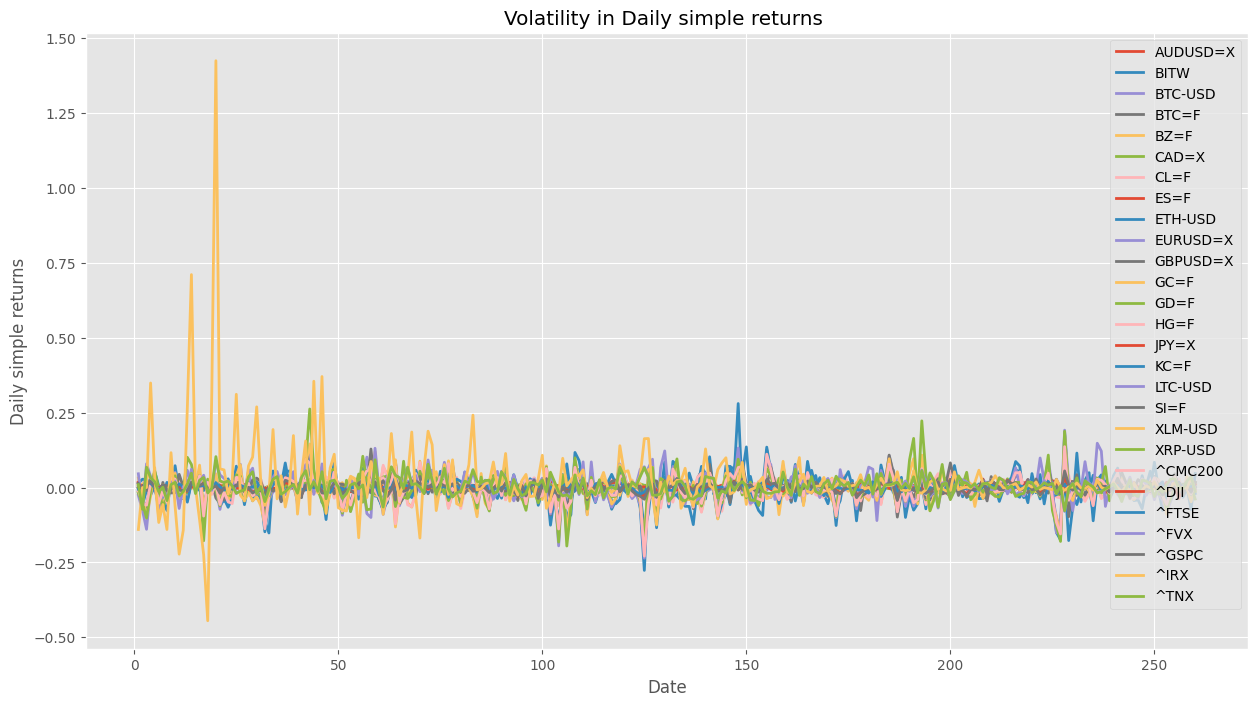

In [174]:
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

In [175]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
AUDUSD=X   -0.017622
BITW       -0.739082
BTC-USD    -0.392185
BTC=F      -0.384345
BZ=F        0.109840
CAD=X       0.025371
CL=F        0.114260
ES=F       -0.047099
ETH-USD    -0.362537
EURUSD=X   -0.022700
GBPUSD=X   -0.035591
GC=F        0.012700
GD=F        0.075050
HG=F       -0.025447
JPY=X       0.067410
KC=F       -0.096864
LTC-USD    -0.291203
SI=F        0.049148
XLM-USD    -0.459512
XRP-USD    -0.257973
^CMC200    -0.421005
^DJI       -0.001299
^FTSE       0.023287
^FVX        0.527268
^GSPC      -0.049611
^IRX        2.338403
^TNX        0.421504
dtype: float64


<Axes: title={'center': 'Risk Box Plot'}>

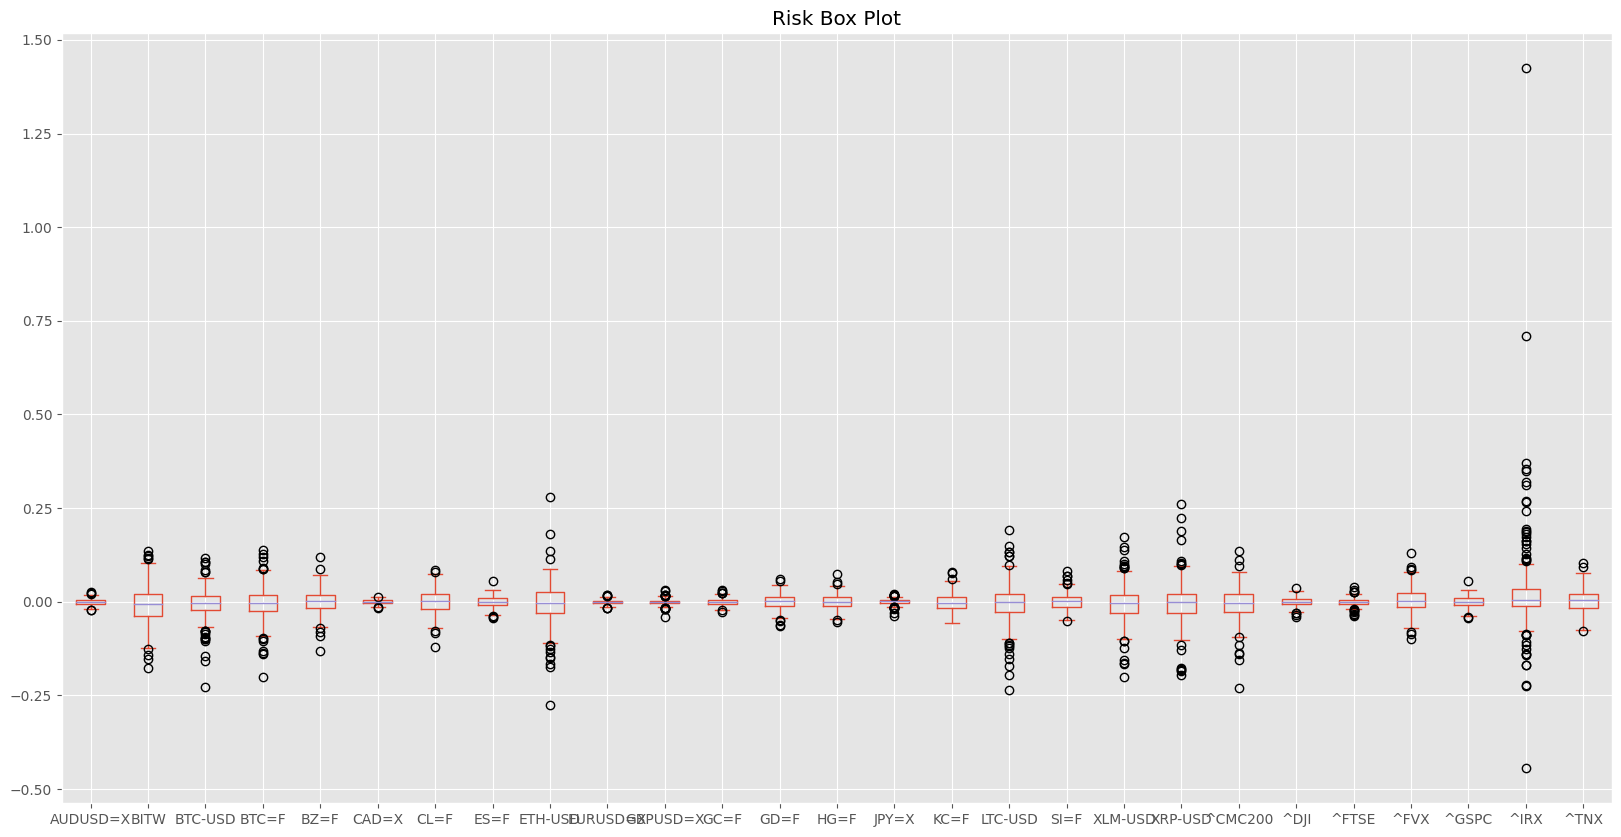

In [176]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")


In [177]:
print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(252) * 100)


Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
AUDUSD=X     12.994078
BITW         78.186887
BTC-USD      63.185379
BTC=F        66.552324
BZ=F         45.659865
CAD=X         8.092067
CL=F         47.817809
ES=F         24.054641
ETH-USD      86.541814
EURUSD=X      9.707961
GBPUSD=X     12.174387
GC=F         15.267678
GD=F         30.321620
HG=F         27.783687
JPY=X        11.776368
KC=F         36.460757
LTC-USD      85.197139
SI=F         31.622748
XLM-USD      77.800485
XRP-USD      86.842971
^CMC200      66.730167
^DJI         19.941818
^FTSE        16.298847
^FVX         51.876739
^GSPC        24.172749
^IRX        203.757178
^TNX         46.476681
dtype: float64


In [178]:
Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100

AUDUSD=X   -0.135616
BITW       -0.945276
BTC-USD    -0.620690
BTC=F      -0.577508
BZ=F        0.240561
CAD=X       0.313524
CL=F        0.238949
ES=F       -0.195800
ETH-USD    -0.418916
EURUSD=X   -0.233827
GBPUSD=X   -0.292339
GC=F        0.083185
GD=F        0.247515
HG=F       -0.091591
JPY=X       0.572415
KC=F       -0.265667
LTC-USD    -0.341799
SI=F        0.155420
XLM-USD    -0.590629
XRP-USD    -0.297057
^CMC200    -0.630907
^DJI       -0.006512
^FTSE       0.142876
^FVX        1.016386
^GSPC      -0.205235
^IRX        1.147642
^TNX        0.906916
dtype: float64

In [179]:
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
daily_cummulative_simple_return

,AUDUSD=X,BITW,BTC-USD,BTC=F,BZ=F,CAD=X,CL=F,ES=F,ETH-USD,EURUSD=X,GBPUSD=X,GC=F,GD=F,HG=F,JPY=X,KC=F,LTC-USD,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^FVX,^GSPC,^IRX,^TNX
1,0.997558,0.996523,0.986860,1.003246,1.011616,1.002865,1.014183,1.014916,0.983499,0.999049,0.998802,0.988269,1.009121,1.012125,0.996319,1.013877,0.973769,0.999148,1.031810,0.981212,0.990326,1.018157,0.994490,1.045887,1.014194,0.860000,1.009763
2,0.994779,0.938842,0.936544,0.939551,1.014665,1.003397,1.010523,1.006432,0.920147,0.997874,1.000306,1.000225,1.007969,1.004473,0.997555,1.042058,0.900122,1.006547,0.994794,0.930685,0.939245,1.016402,0.993527,0.973160,1.005626,0.860000,0.936541
3,0.984968,0.930456,0.883851,0.859098,1.061130,1.003343,1.059783,1.018077,0.950239,0.997750,0.995592,0.997699,1.030818,1.021071,0.997732,1.068318,0.774683,0.996816,0.902891,0.835869,0.883926,1.035418,1.008872,1.050217,1.017423,0.860000,1.000000
4,0.989362,0.920434,0.885903,0.887875,1.095397,0.999037,1.098826,1.039148,0.940717,0.996151,0.997626,1.000561,1.041091,1.021307,1.001403,1.041418,0.776628,1.008431,0.875881,0.826081,0.894572,1.049891,1.023882,1.088312,1.038491,1.160000,1.032078
5,0.999663,0.970342,0.882491,0.893578,1.100915,0.989941,1.103553,1.042254,0.967815,0.995253,0.996251,1.001010,1.051171,1.033785,1.001995,1.045047,0.790652,1.004081,0.933820,0.871209,0.907245,1.050929,1.023533,1.091775,1.041695,1.200000,1.052301
6,1.006316,0.974432,0.832994,0.836550,1.080587,0.990442,1.081897,1.035156,0.898152,1.001350,0.993540,0.996071,1.036386,1.019423,1.003398,1.026260,0.726393,0.985425,0.835839,0.869155,0.859679,1.050927,1.021287,1.088312,1.034214,1.060000,1.036960
7,1.002965,0.930661,0.825501,0.850851,1.091186,0.994841,1.093030,1.044915,0.852083,0.996736,0.994591,1.000730,1.046371,1.008358,1.001315,0.993595,0.711094,0.993767,0.796642,0.808429,0.850378,1.057285,1.017172,1.083983,1.044090,1.000000,1.038354
8,1.005768,0.859276,0.816663,0.817600,1.080151,0.995741,1.087235,1.035544,0.824991,0.998371,0.997083,1.002638,1.041283,1.007652,1.001783,1.010675,0.691654,0.999596,0.772005,0.790060,0.808785,1.047878,1.008746,1.050217,1.034551,0.860000,0.993027
9,1.001148,0.881571,0.814481,0.839972,1.070132,1.002607,1.078695,1.028502,0.816536,0.996039,0.993803,0.993714,1.033794,1.001530,1.002454,1.012596,0.699034,0.981524,0.794974,0.803537,0.835105,1.044740,1.006961,1.068398,1.026822,0.960000,1.002789
10,0.997334,0.892002,0.854392,0.865941,1.072746,1.007265,1.080830,1.044582,0.876040,0.993908,0.995080,0.989335,1.031509,0.983991,1.003919,1.013664,0.734625,0.964528,0.832585,0.835004,0.858450,1.056005,1.000293,1.091775,1.043609,0.900000,1.020223


Cummulative Returns


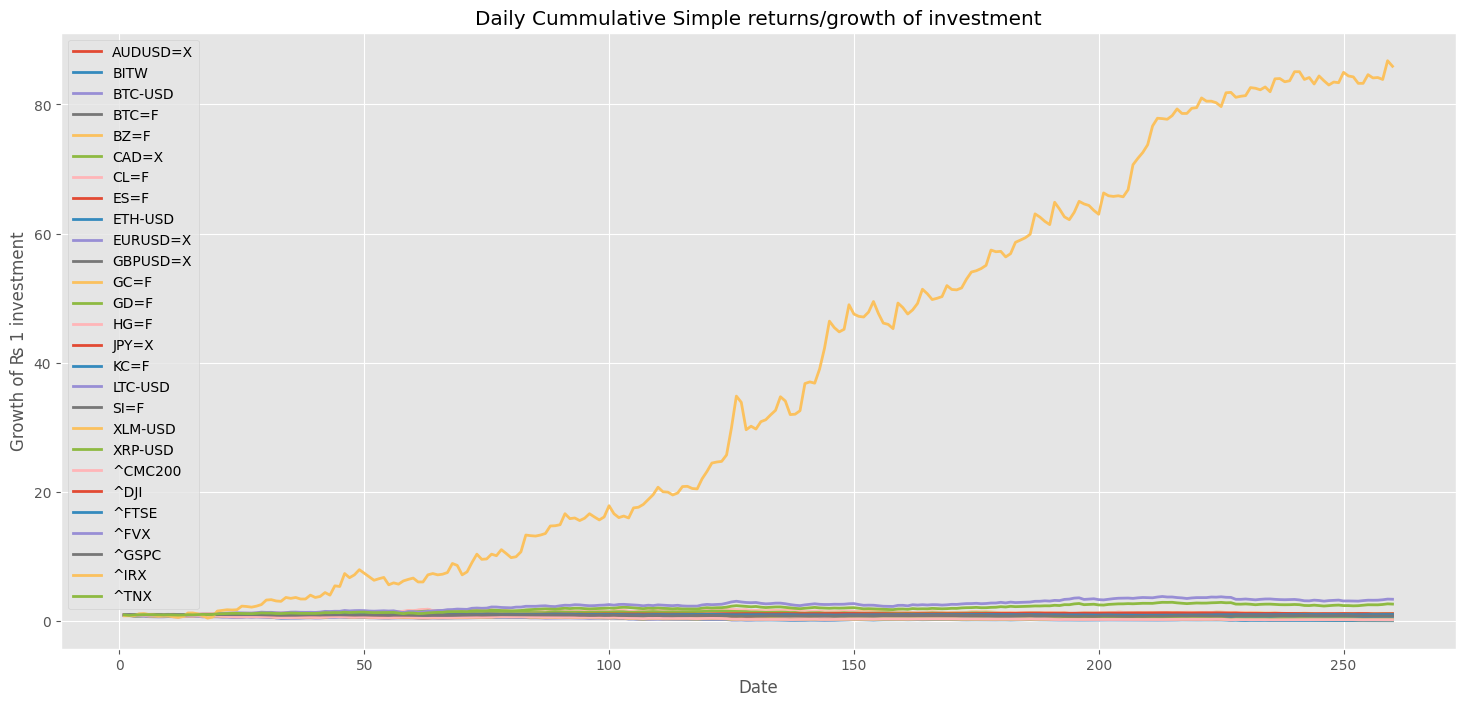

In [180]:
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)

In [186]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AUDUSD=X,BITW,BTC-USD,BTC=F,BZ=F,CAD=X,CL=F,ES=F,ETH-USD,EURUSD=X,GBPUSD=X,GC=F,GD=F,HG=F,JPY=X,KC=F,LTC-USD,SI=F,XLM-USD,XRP-USD,^CMC200,^DJI,^FTSE,^FVX,^GSPC,^IRX,^TNX
AUDUSD=X,0.000067,-0.000037,-0.000029,-0.000019,0.000046,-3.340022e-05,0.000043,-0.000010,-0.000039,3.225897e-05,4.502349e-05,1.641182e-05,3.188155e-05,0.000031,-0.000027,1.489410e-05,-0.000058,0.000025,-0.000037,-0.000041,-0.000024,-7.883541e-06,2.149454e-06,-0.000011,-0.000010,-0.000110,-1.525546e-05
BITW,-0.000037,0.002499,0.001322,0.001538,0.000142,6.715881e-06,0.000197,0.000351,0.001831,-1.734234e-05,-3.456345e-05,2.554657e-05,1.427523e-04,0.000149,0.000056,4.974628e-05,0.001584,0.000168,0.001357,0.001424,0.001577,2.656946e-04,1.678954e-04,0.000061,0.000354,0.000488,7.884005e-05
BTC-USD,-0.000029,0.001322,0.001677,0.001515,0.000086,1.120675e-05,0.000127,0.000335,0.002039,-6.228798e-06,-2.358003e-05,3.878716e-05,1.058121e-04,0.000111,0.000026,8.596901e-05,0.001855,0.000143,0.001675,0.001693,0.001648,2.467643e-04,1.076315e-04,-0.000078,0.000342,0.000287,-4.974230e-05
BTC=F,-0.000019,0.001538,0.001515,0.001818,0.000110,1.035687e-05,0.000181,0.000353,0.001813,-5.316410e-06,-2.217026e-05,3.550902e-05,1.316712e-04,0.000143,0.000026,8.198749e-05,0.001671,0.000159,0.001511,0.001535,0.001669,2.594046e-04,1.219470e-04,-0.000087,0.000359,0.000344,-3.973078e-05
BZ=F,0.000046,0.000142,0.000086,0.000110,0.000836,-1.803619e-05,0.000813,0.000047,0.000151,-8.620933e-06,1.198585e-05,9.938689e-05,4.650373e-04,0.000218,-0.000010,1.698426e-04,0.000044,0.000188,0.000061,0.000045,0.000111,3.904626e-05,5.472392e-05,0.000081,0.000045,-0.000045,7.780528e-05
CAD=X,-0.000033,0.000007,0.000011,0.000010,-0.000018,2.598984e-05,-0.000017,0.000002,0.000018,-1.893940e-05,-2.449567e-05,-9.578506e-06,-1.522719e-05,-0.000020,0.000012,-1.518186e-05,0.000025,-0.000011,0.000018,0.000028,0.000013,1.327120e-06,-2.925038e-06,0.000001,0.000003,0.000039,8.296538e-07
CL=F,0.000043,0.000197,0.000127,0.000181,0.000813,-1.719147e-05,0.000917,0.000055,0.000199,-9.109525e-06,6.793919e-06,1.048827e-04,5.088755e-04,0.000235,-0.000010,1.955042e-04,0.000049,0.000211,0.000106,0.000055,0.000182,4.561506e-05,5.732294e-05,0.000045,0.000054,0.000047,5.488026e-05
ES=F,-0.000010,0.000351,0.000335,0.000353,0.000047,2.365452e-06,0.000055,0.000230,0.000443,-3.237390e-06,-1.178944e-06,1.375840e-05,4.224113e-05,0.000059,0.000004,2.133179e-05,0.000381,0.000063,0.000357,0.000319,0.000371,1.827751e-04,6.555155e-05,-0.000040,0.000230,0.000042,-2.424645e-05
ETH-USD,-0.000039,0.001831,0.002039,0.001813,0.000151,1.782045e-05,0.000199,0.000443,0.003092,-4.609611e-06,-3.181962e-05,4.485493e-05,1.530098e-04,0.000203,0.000026,1.653400e-04,0.002479,0.000164,0.002195,0.002257,0.002158,3.268677e-04,1.610716e-04,-0.000038,0.000452,0.000407,1.618342e-05
EURUSD=X,0.000032,-0.000017,-0.000006,-0.000005,-0.000009,-1.893940e-05,-0.000009,-0.000003,-0.000005,3.739750e-05,3.516346e-05,7.252507e-06,-9.886436e-07,0.000013,-0.000018,-1.586658e-06,-0.000017,0.000010,-0.000015,-0.000025,-0.000009,-1.961535e-06,-2.248577e-06,-0.000017,-0.000003,-0.000077,-1.541565e-05
